## Rose Tovar
#### Insurance Hypothesis
#### 9/29/2022

In [55]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


### Data upload

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Question 1

- Do smokers have higher insurance charges than non-smokers?

- Null Hypothesis -> Smokers have the same insurance charges as non -smokers
- Alternative Hypothesis -> Smokers have higher insurance charges than non smokers

> because we are dealing with 2 samples and numeric data we will be using a 2 sample T test

In [4]:
### Value Counts
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
# Filter out non smokers to smokers
smokers_df = df.loc[df['smoker'] == 'yes'].copy()
non_smokers_df = df.loc[df['smoker'] == 'no'].copy()




In [7]:
smokers_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [24]:
non_smokers_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [15]:
# check for outliers
def outlier_check_and_removal(df, col):
    zcores = stats.zscore(df[col])
    outliers = abs(zcores) > 3
    print(f"You have {np.sum(outliers)} outliers")
    temp = np.abs(stats.zscore(df[col]) < 3)
    return df[temp]

In [25]:
non_smoker_data = outlier_check_and_removal(non_smokers_df, 'charges')['charges']
non_smoker_data

You have 24 outliers


1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [26]:
smoker_data = outlier_check_and_removal(smokers_df, 'charges')['charges']
smoker_data

You have 0 outliers


0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

#### Testing for Normality

In [27]:
stats.normaltest(non_smoker_data)

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [28]:
stats.normaltest(smoker_data)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

We reject the null hypothesis and as a result these are different than normal, but we can continue forward because of the number data being over 30

#### Testing for Equal Variance

In [29]:
stats.levene(smoker_data, non_smoker_data)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Once again we reject the null hypothesis that there is equal variance, Since there is not equal variance must now move foward with equal_var = false in our T Test

In [30]:
stats.ttest_ind(smoker_data, non_smoker_data, equal_var=False)

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

We reject the null hypothesis and there is a a significant increase in charges for smokers in insurance

<AxesSubplot:xlabel='smoker', ylabel='charges'>

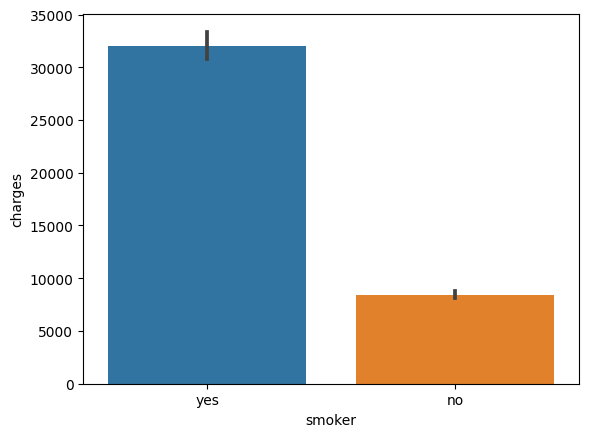

In [31]:
sns.barplot(data=df, x='smoker', y='charges')

### Question 2

- Are men more likely to smoke than women? 

- Null Hypothesis -> Both men and women have the same chances of smoking
- Alternative Hypothesis -> Men are more likely to to smoke than women

Because we have 2 samples and both are categorical data we will be using a chi square test

In [34]:
### Creating Cross Table
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [35]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

print(p)
p<.05

0.006548143503580696


True

Our p value tells us that we reject the null hypothesis, and as a result men are more likely to smoke than women

### Question 3

-Do different regions have different charges, on average?

- Null Hypothesis - All regions have the same charges
- Alternate Hypthosis - Different Regions have different charges

<AxesSubplot:xlabel='region', ylabel='charges'>

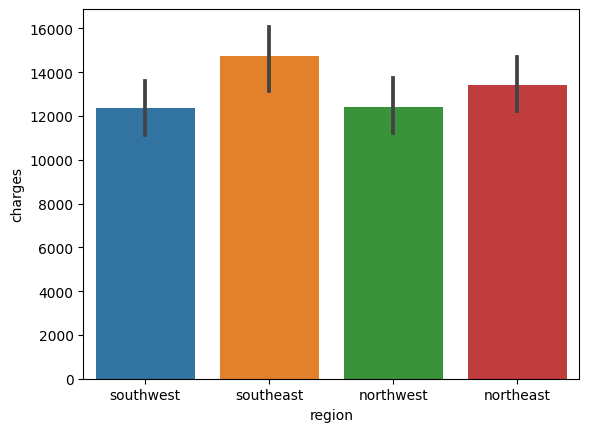

In [37]:
sns.barplot(data=df, x='region',y='charges')

- Because we have 4 groups and we are dealing with numeric data we will be using an ANOVA Test

In [44]:
# Create groups dic
groups = {}
for i in df['region'].unique():
    data = df.loc[df['region']==i, 'charges'].copy()
    
    groups[i] = data

    
groups.keys()
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

In [46]:
### Run normal for each cell
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    
    norm_results[i] = {
        'n': len(data),
        "p": p,
        "test_stat": stat
    }

norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test_stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [47]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test_stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


Each one of them fails the normality test, meaning they are not normal, Because of the amount of them we can move on with the equal variance test

In [63]:
results = stats.levene(*groups.values())
results.pvalue < .05

True

Because we reject the null hypothesis there is not equal variance and we must now use the Kruskal Wallis test

In [62]:
stats.kruskal(*groups.values())

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

Kruskal tells us that there is no significant difference between the regions and the charges being made 